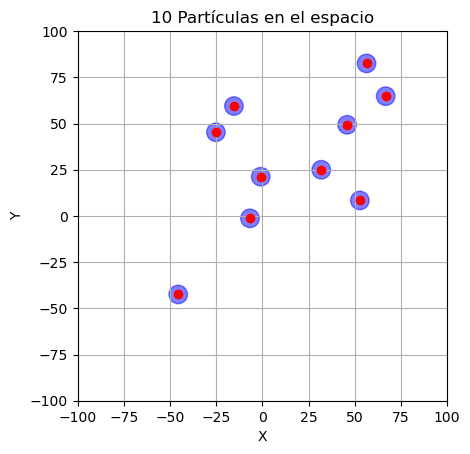

In [6]:
import random
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, x, y, radius):
        self.x = x
        self.y = y
        self.radius = radius

    def __repr__(self):
        return f"Particle(x={self.x:.2f}, y={self.y:.2f}, radius={self.radius:.2f})"

def generate_particles(n, r, space_limit=None):
    """
    Genera N partículas con radio r en un espacio ilimitado.
    
    Args:
        n (int): Número de partículas.
        r (float): Radio de las partículas.
        space_limit (tuple or None): Límite del espacio como (xmin, xmax, ymin, ymax).
                                     Si es None, no hay límites (espacio infinito).
    
    Returns:
        list: Lista de partículas generadas.
    """
    particles = []
    for _ in range(n):
        if space_limit:
            x = random.uniform(space_limit[0], space_limit[1])
            y = random.uniform(space_limit[2], space_limit[3])
        else:
            x = random.uniform(-1e3, 1e3)  # Valores grandes para simular infinito
            y = random.uniform(-1e3, 1e3)
        particles.append(Particle(x, y, r))
    return particles

def plot_particles(particles, space_limit=None):
    """
    Dibuja las partículas en un espacio 2D.
    
    Args:
        particles (list): Lista de partículas a dibujar.
        space_limit (tuple or None): Límite del espacio como (xmin, xmax, ymin, ymax).
    """
    fig, ax = plt.subplots()
    for particle in particles:
        circle = plt.Circle((particle.x, particle.y), particle.radius, color='blue', alpha=0.5)
        ax.add_artist(circle)
        ax.plot(particle.x, particle.y, 'ro')  # Marca el centro de la partícula
    
    if space_limit:
        ax.set_xlim(space_limit[0], space_limit[1])
        ax.set_ylim(space_limit[2], space_limit[3])
    else:
        ax.set_xlim(-1e3, 1e3)
        ax.set_ylim(-1e3, 1e3)
    
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'{len(particles)} Partículas en el espacio')
    plt.grid(True)
    plt.show()

# Parámetros
N = 10  # Número de partículas
R = 5   # Radio de las partículas
SPACE_LIMIT = (-100, 100, -100, 100)  # Límite del espacio, si es necesario (None para infinito)

# Generación y visualización
particles = generate_particles(N, R, space_limit=SPACE_LIMIT)
plot_particles(particles, space_limit=SPACE_LIMIT)





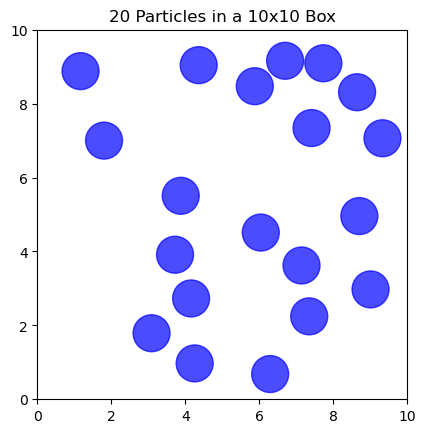

In [8]:
import random
import matplotlib.pyplot as plt

def generate_particles(num_particles, box_width, box_height, particle_radius):
    particles = []

    def is_valid_position(x, y):
        # Check that the particle is within the box and doesn't overlap with others
        if x - particle_radius < 0 or x + particle_radius > box_width:
            return False
        if y - particle_radius < 0 or y + particle_radius > box_height:
            return False
        for px, py in particles:
            if ((x - px) ** 2 + (y - py) ** 2) < (2 * particle_radius) ** 2:
                return False
        return True

    for _ in range(num_particles):
        while True:
            x = random.uniform(particle_radius, box_width - particle_radius)
            y = random.uniform(particle_radius, box_height - particle_radius)
            if is_valid_position(x, y):
                particles.append((x, y))
                break

    return particles

def plot_particles(particles, box_width, box_height, particle_radius):
    fig, ax = plt.subplots()
    ax.set_xlim(0, box_width)
    ax.set_ylim(0, box_height)
    
    for x, y in particles:
        circle = plt.Circle((x, y), particle_radius, color='blue', alpha=0.7)
        ax.add_artist(circle)

    ax.set_aspect('equal', adjustable='box')
    plt.title(f"{len(particles)} Particles in a {box_width}x{box_height} Box")
    plt.show()

# Parameters
N = 20  # Number of particles
box_width = 10  # Width of the box
box_height = 10  # Height of the box
r = 0.5  # Radius of each particle

# Generate and plot particles
particles = generate_particles(N, box_width, box_height, r)
plot_particles(particles, box_width, box_height, r)